# Car Price Prediction in Machine Learning

# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Perform EDA

# Check the shape of data

In [3]:
df.shape

(301, 9)

# Check unique values of some features

In [4]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


# Check that there is null values or not

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# describe data

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Drop Car_Name

In [7]:
df1 = df.drop(columns='Car_Name')
df1.shape

(301, 8)

# Find today's date for check that how much car is old

In [8]:
x = datetime.datetime.now()
x.year

2021

# Make new feature of No. _of _Years from existing feature

In [9]:
df1['No._of_Years'] = x.year - df1.Year
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No._of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Now drop Year feature

In [10]:
df1.drop(columns = 'Year' , axis=1 , inplace=True)

In [11]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No._of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Apply OneHotEncoding

In [12]:
df1 = pd.get_dummies(df1 , drop_first=True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No._of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Visualize data

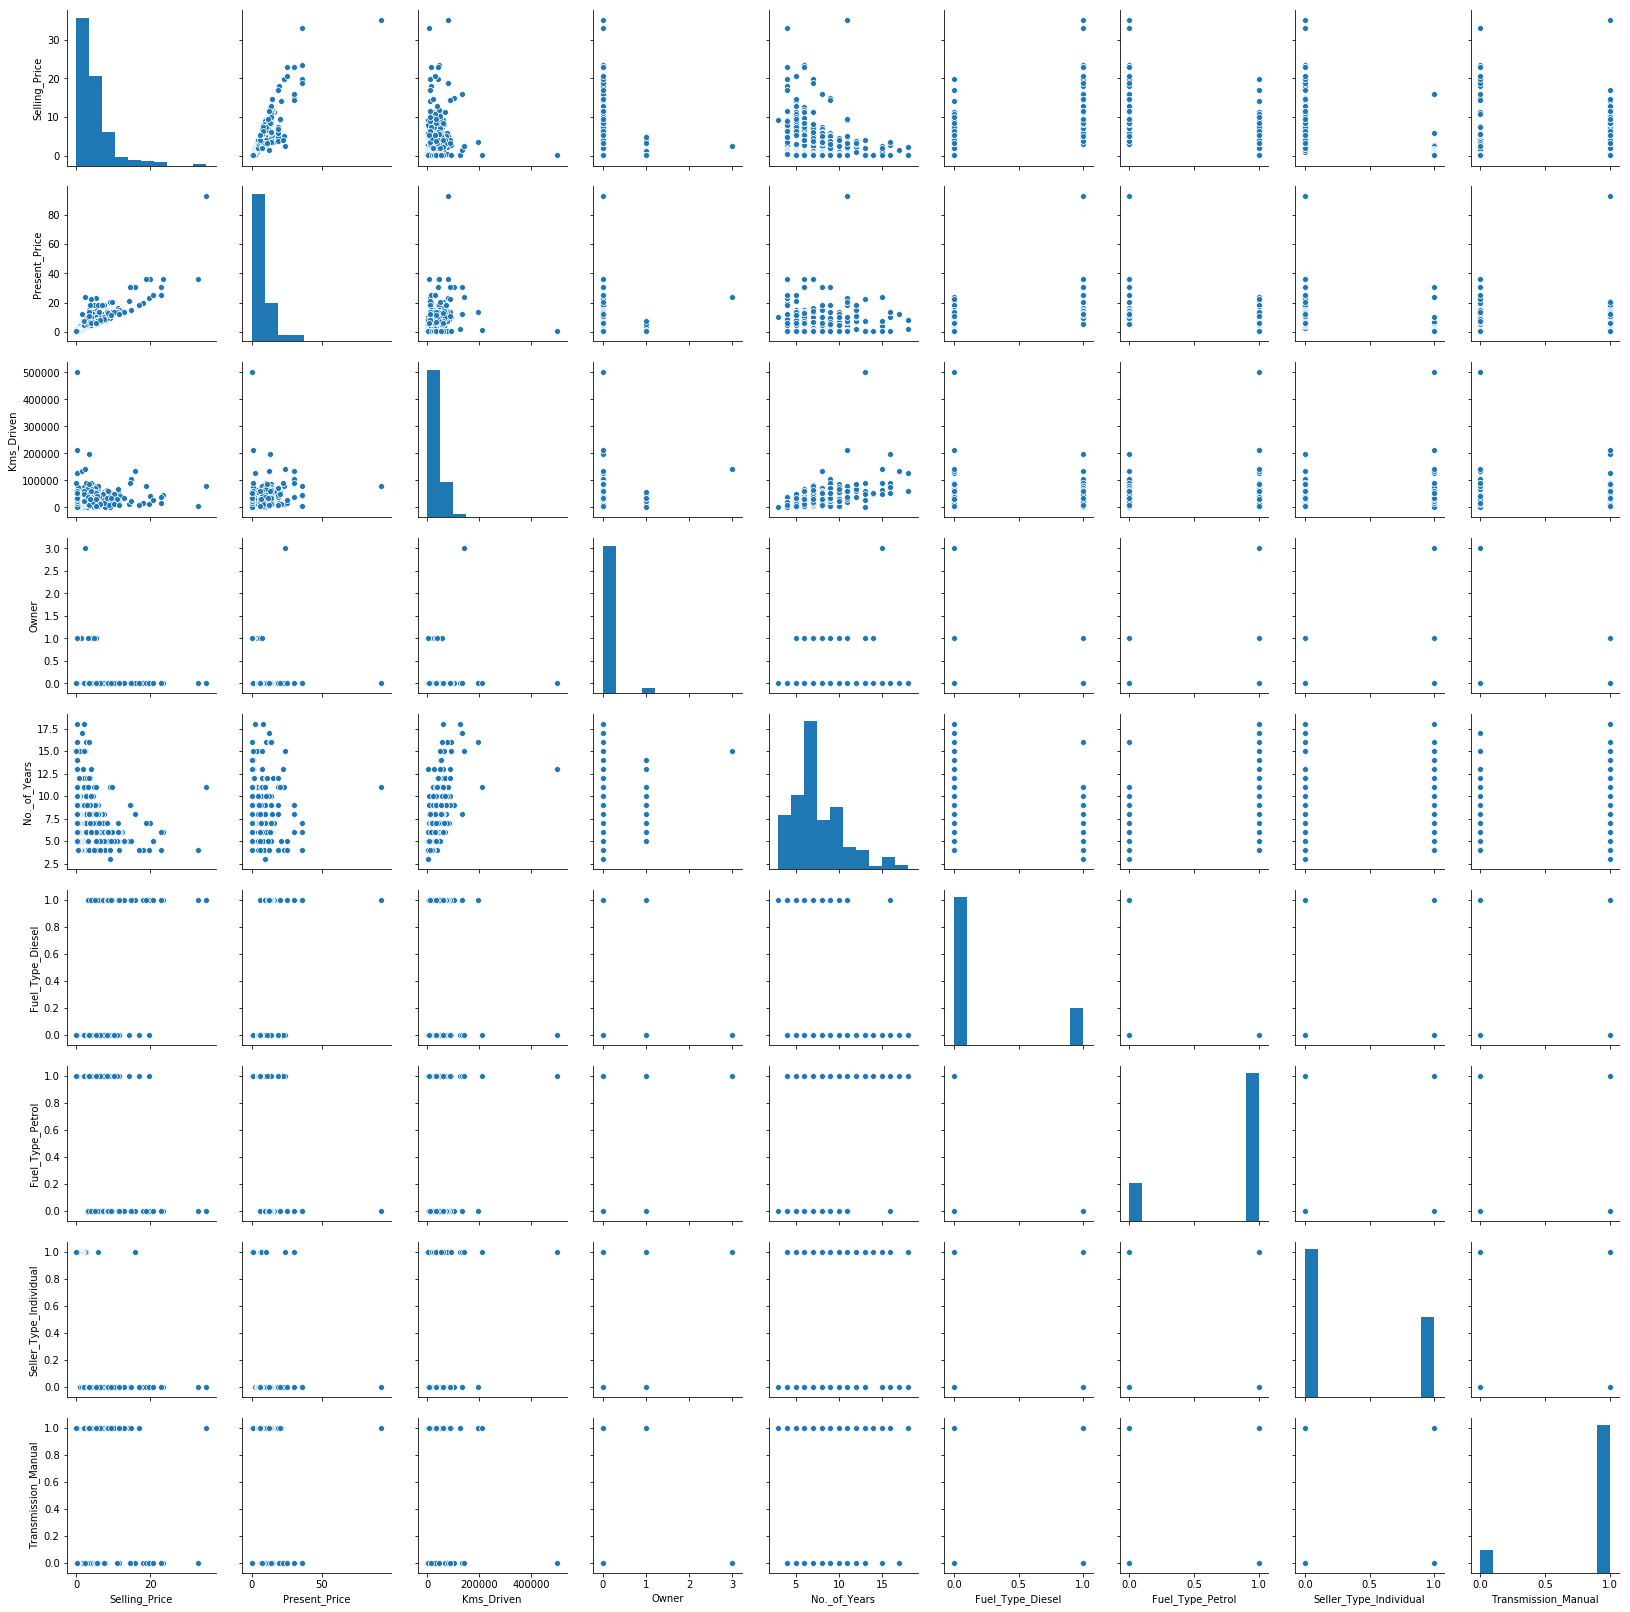

In [13]:
sns.pairplot(df1)

# Visualize the correlation using heatmap

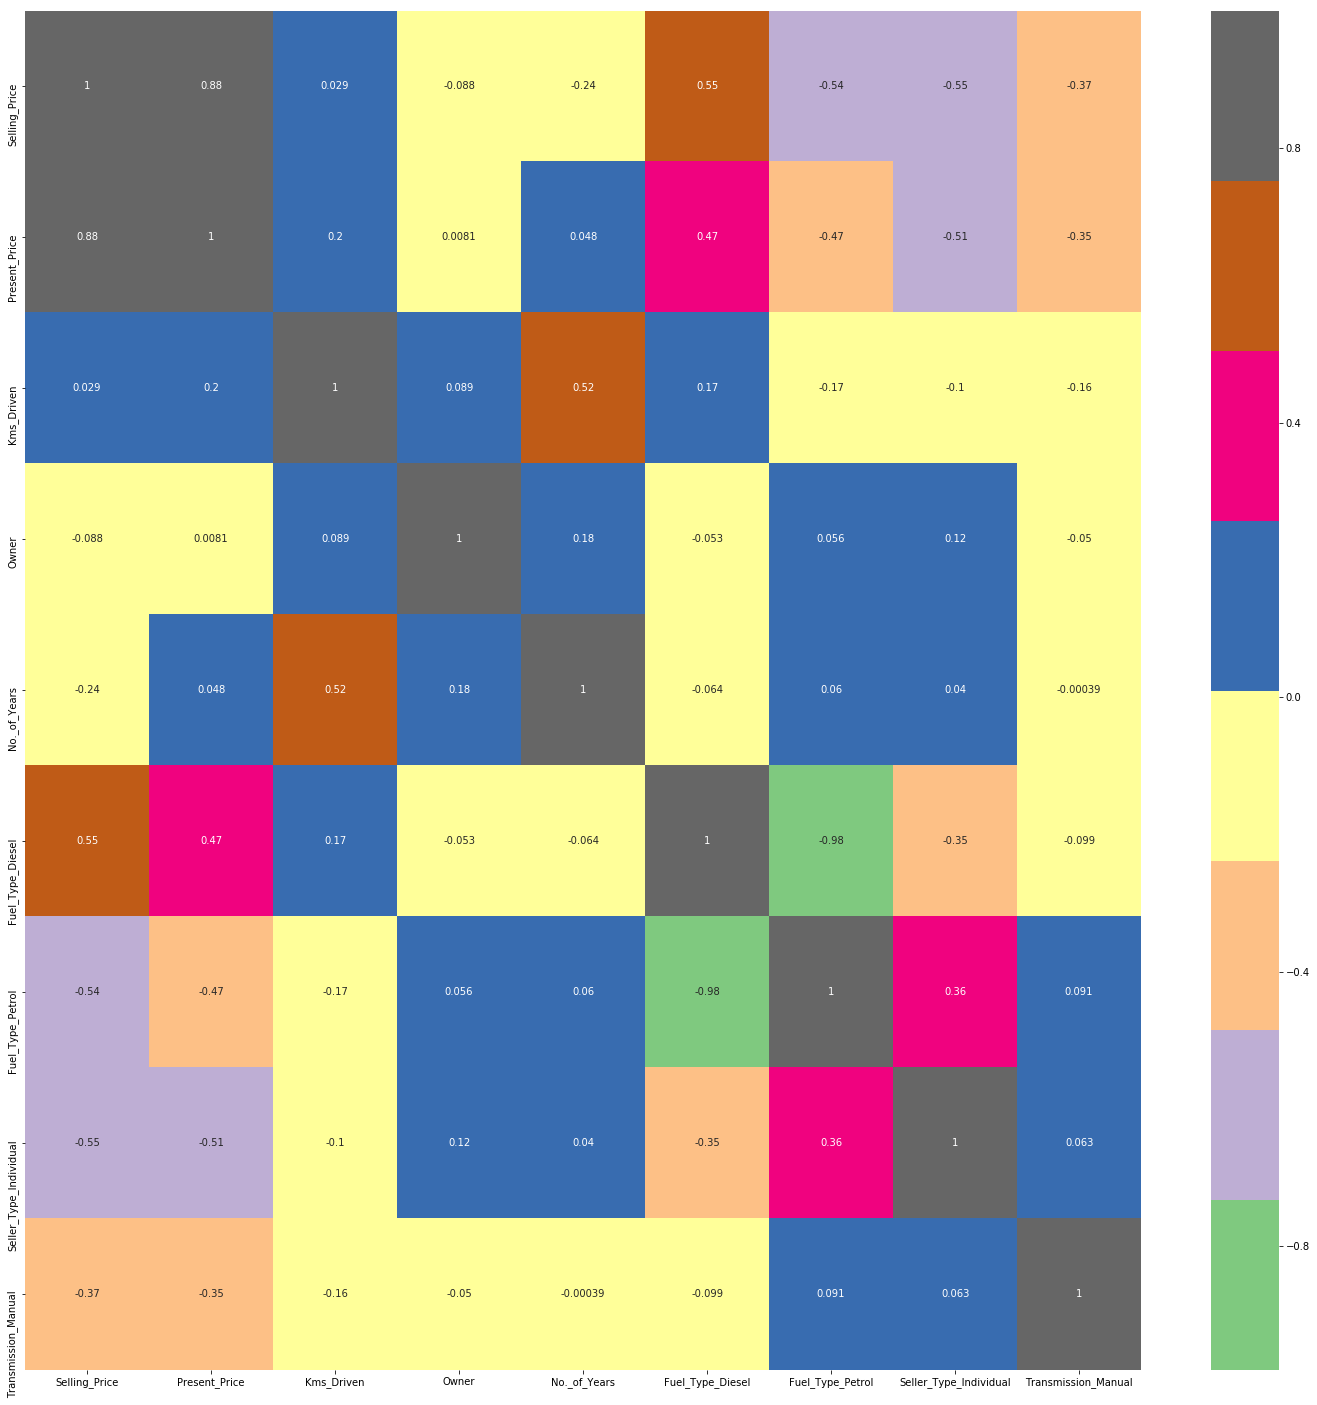

In [14]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (25,25))
h = sns.heatmap(df1[top_corr_features].corr() , annot=True , cmap='Accent')

# divide data into dependent and independent features

In [15]:
X = df1.drop(columns='Selling_Price')
y = df1['Selling_Price']

# Split data into training and testing

In [16]:
shuffle = StratifiedShuffleSplit(random_state=51 , test_size=0.2 , n_splits=1)

for train_index , test_index in shuffle.split(df1 , df1['Fuel_Type_Diesel'] , df1['Fuel_Type_Petrol']):
    X_train_shuffle = df1.iloc[train_index]
    X_test_shuffle =  df1.iloc[test_index]

In [17]:
X_train_shuffle.shape ,  X_test_shuffle.shape

((240, 9), (61, 9))

In [18]:
X_train = X_train_shuffle.drop(columns = 'Selling_Price')
y_train = X_train_shuffle['Selling_Price']
X_test = X_test_shuffle.drop(columns = 'Selling_Price')
y_test = X_test_shuffle['Selling_Price']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((240, 8), (61, 8), (240,), (61,))

# Apply Hyperparameter Tuning on RandomForestRegressor

In [19]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [20]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [21]:
rfr = RandomForestRegressor()

In [22]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rfr = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                         n_iter = 10, cv = 5, verbose=2, random_state=51, n_jobs = 1)

In [23]:
rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=51, scoring='neg_mean_squared_error',
                   verbose=2)

# Predict data

In [24]:
pred = rfr.predict(X_test)

# Check the r2_score

In [33]:
r2_score(pred , y_test)

0.9656759933799154

# Visualize the actual and predicted data

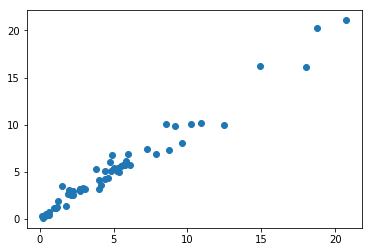

In [25]:
plt.scatter(y_test,pred)

# Display the actual and predicted data

In [26]:
pd.DataFrame(np.c_[y_test , pred] , columns =['Actual' , 'Predicted'])

,Actual,Predicted
0,12.50,10.006827
1,0.50,0.455760
2,0.65,0.705512
3,0.35,0.392024
4,14.90,16.263583
...,...,...
56,9.15,9.904631
57,4.75,6.072011
58,10.25,10.055072
59,0.38,0.313276


# Save model

In [27]:
import pickle

In [28]:
file = open('car_price_prediction_model.pkl','wb')
pickle.dump(rfr,file)

# Thank You!!!!!!!!!!!!